# One Sample Location Z Test

This is one of the basic tests, it is used as a starting point for others such as: proportion, two sample, the t-test and their variants. The main idea is try to infer a the mean of the population $\mu$ (a parameter) given the mean of a random sample $m$ (a statistic), we are able to do this by taking advantage of the Law of Large Numbers and the Central Limit Theorem, intuitively because of LLN $m$ will converge to $\mu$ as the sample size grows, and because of the CLT we assume that an $m$ obtained from a random sample will be normally distributed around $\mu$, with a variance that is reduced as the sample size grows, therefore given a sample size we can determine the certainty of our observed $m$. There is a caveat with this Z-test, which is that it also requires us to assume we know the population's variance, which in practice is not usual (see t-test).


We will consider the case of people's heights, which we will model with a normal distribution $\mathcal{N}(\mu,\,\sigma^{2})$ with $\mu=170$ and $\sigma=8$ in centimeters. Here we defined population parameter $\mu$, but in a real setting we wouldn't know it, before going into the Z-test let's take one last look at the actual population distribution:

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
mu = 170
sigma = 8

We plot the PDF from $\mu \pm 5\sigma$

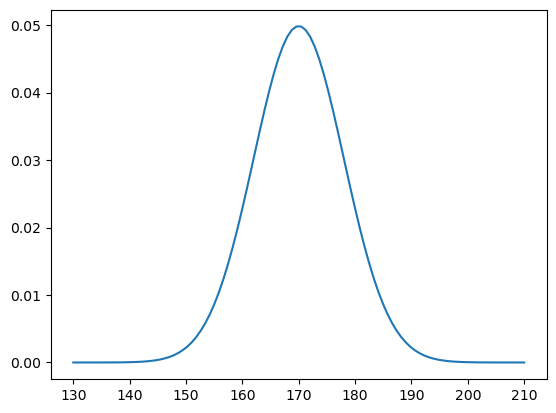

In [3]:
normal_dist = norm(mu, sigma)  # mean and std

x = np.linspace(mu-5*sigma, mu+5*sigma, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, normal_dist.pdf(x))

This is how the true distribution would look like, but in practice we wouldn't know it (except for the variance), is important to notice that the test is not meant to determine what is the true parameter $\mu$, but to test that if we assumed the parameter to have some value $\mu_{0}$, which is called the Null Hypothesis, and we sampled the population randomly (I.I.D), what would be the probability of having observed the sample mean $m$ given the CLT and our sample size, intuitively as the sample size $n$ grows, we are more certain of the observed $m$, because the variance of the statistic shrinks.

Let's demonstrate it, first we will choose a null hypothesis, we assume the average height is 165cm.

In [4]:
mu_0 = 165

Next draw a sample of size 30 and compute its $m$.

In [5]:
n = 30

np.random.seed(1)
m = normal_dist.rvs(n).mean()
m

169.52048871475503

What would be the probability of having observed $m=165.52$ if the true population mean was $\mu_{0}=165$?

If $\mu_{0}$ was true, then by the CLT the means of the samples would be normally distributed around it, to model the distribution we only have left to get the variance of the hypothetical distribution, the CLT tells us that the standard deviation of the sample means will have a standard deviation of $\frac{\sigma}{\sqrt{n}}$, known as the **standard error**, where $\sigma$ is the known population's standard deviation.

So if our null hypothesis were true, the means of random samples would be distributed following $\mathcal{N}(\mu_{0},(\frac{\sigma}{\sqrt{n}})^{2})$, we can visualize this distribution and plot a line that marks the location of $m$.

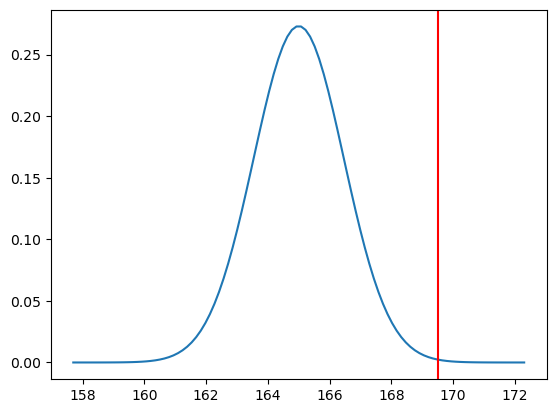

In [6]:
se = sigma / np.sqrt(n)

null_dist = norm(mu_0, se)  # mean and std

x = np.linspace(mu_0-5*se, mu_0+5*se, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, null_dist.pdf(x))
ax.axvline(x=m, color='r')

Visually we can already tell that having observed $m$ would have a very low probability, to find what is the actual probability we can standardize the value of $m$ (In other literature specified by $\bar{X}$) with respect to the hypothetical distribution $\mathcal{N}(\mu_{0},SE^{2})$, this is known as the Z-score, the standardized value equals the number of standard deviations away from the mean.

$$
Z = \frac{m - \mu_{0}}{SE}
$$

Computing our Z-score we find that the probability of having observed $m$ if $\mu_{0}$ was true, would be 3.09 standard deviations to the right of the assumed population $\mu_{0}$.

In [7]:
z = (m - mu_0) / se
z

3.094967050023585

We could visualize the hypothetical distribution but standardized:

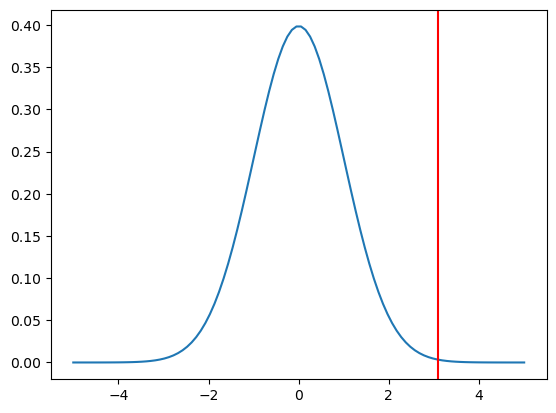

In [8]:
st_dist = norm(0, 1)  # mean and std

x = np.linspace(-5, 5, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, st_dist.pdf(x))
ax.axvline(x=z, color='r')

Instead of number of standard deviations we can translate this to a probability, to compute the probability we have to integrate over a range, there are three ways to do this:

- What is the probability of having observed $m$ or a value **lower** than $m$ (left/lower one tailed test)
- What is the probability of having observed $m$ or a value **greater** than $m$ (right/upper one tailed test)
- What is the probability of having observed $m$ or a more **extreme** deviation from $\mu_{0}$ (two tailed test)

In all we are looking for the probability of having observed some Z-score or a *more extreme* value, which is just a value farther away from the mean, let's do the first one, what would be the probability of having observed $m<169.52$ or a standardized $z<3.09$?

We can compute this by integrating over the standard PDF from $(-\infty, 3.09]$, which is equivalent of looking up the CDF up to 3.09, this would be the probabillity of having observed any value lower than 3.09:


In [9]:
p_lower = st_dist.cdf(z)
p_lower

0.9990158261872688

If we are interested in the probability of observing values greater than 3.09, we just substract the previous probability from 1.

In [10]:
p_higher = 1 - p_lower
p_higher

0.0009841738127311928

Often we just want to find the probability of having observed a more extreme value (either left or right) from $\mu_{0}$ we would integrate the area on both tails towards the extremes, from $(\infty, -z]$ and then from $[z, \infty)$, one way to do this is to evaluate the CDF from -Z to Z and then substract from 1.

In [11]:
p_nz = st_dist.cdf(-np.abs(z))  # The probability to observe from [-inf, -z]
p_pz = st_dist.cdf(np.abs(z))  # Probability to observe from [-inf, z]
p_extreme = 1 - (p_pz - p_nz)
p_extreme

0.0019683476254623855

This p-value indicates that the probability of having observed $m=169.52$ or a more extreme value, if $\mu_{0}=165$ were true, and given the sample size $n=30$ is very low, this result would suggest that we should reject the null hypothesis, because if it were true then it would be very unlikely that we have observed the sample statistic. In practice we define an alpha value which is the threshold at which we would reject the null hypothesis, we select this alpha before starting the test usually to be 0.05. In case the p-value is higher then we do not reject the null hypothesis, there is not enough evidence to do so.

Consider that a low p-value does not guarantee that the null hypothesis is false, we could just have gotten unlucky and actually drawn a sample that was unlikely.

## Confidence Interval

The Z-test itself is not meant to estimate the parameter but reject or not a $H_{0}$, however we can use the same ideas to construct a confidence interval. The intuiton is as follows, let's consider the standard normal with true $\mu=0$, how many standard deviations away from 0 would we need to cover 95% of the distribution? We could find the negative value by integrating from $-\infty$ up until we cover 2.5% of the distribution in the left tail, the positive Z-score has the same magnitude for the 2.5% in right tail.

In [45]:
x = np.linspace(-6, 0, 10000)  # To be practical we will define the full range from -6 to 0 standard deviations

cum_p = st_dist.cdf(x)
x[sum(cum_p < 0.025)]

-1.9597959795979598

This means 95% of the standard normal lies between $[-1.96, 1.96]$, for every value $z$ in this range we can construct an interval $[z -1.96, z + 1.96]$, and all of these intervals would contain the true $\mu=0$. Any other interval constructed for an $z$ lower than -1.96 or higher than 1.96 would not contain zero (the true mean).

We can apply this same intuition to the samples' means distribution, we know 95% of the sample means $m$ will fall within $[\mu - 1.96(SE), \mu + 1.96(SE)]$, so if we construct an interval for any of these $m$ such that $[m - 1.96(SE), m + 1.96(SE)]$ we can expect all of them to contain the true $\mu$, therefore in the long run if we sample and construct intervals we can expect 95% of them to contain the true mean, the chosen 95% is called the confidence level.

Since the values for a 95% confidence interval given a sample are obtained by:

$$
CI = m \pm 1.96(SE)
$$

Let's compute the confidence interval for our sample mean:

In [46]:
min_mu_0 = m - (1.96 * se)
max_mu_0 = m + (1.96 * se)
min_mu_0, max_mu_0

(166.65772548086136, 172.3832519486487)

They are equivalent to the minimum and maximum values of a null hypothesis $\mu_{0}$ that given our sample would result in a p-value of 0.05 for a two tailed Z-test.

$$
\begin{align}
Z &= \frac{m - \mu_{0}}{SE}  \\
\mu_{0} &= m - Z(SE)
\end{align}
$$

Find the p-value for our sample mean $m$ if we assumed the $H_{0}$ to be the bounds of the interval:

In [56]:
z = (m - max_mu_0) / se
st_dist.cdf(z)

0.02499789514822021

In [57]:
z = (m - min_mu_0) / se
st_dist.cdf(z)

0.9750021048517797

Corroborating that the bounds of the interval are the values where $\mu_{0}$ would result in a 0.025 p-value on each of the tails. As a final experiment we can simulate 1,000 samples and verify if 95% of them contain the true $\mu=170$

In [47]:
n = 30

np.random.seed(1)
# Means of 1000 samples
ms = np.array([normal_dist.rvs(n).mean() for i in range(1000)])

Compute the confidence interval for each sample and find what percentage of these intervals do not contain the true $\mu$

In [48]:
intervals = np.array([
    (
        m - (1.96 * se),
        m - (-1.96 * se)
    )
    for m in ms
])

param_in_interval = (ms - (1.96 * se) <= mu) & (mu <= ms - (-1.96 * se))  # Those where parameter is in interval
# What is the ratio of missed intervals
param_in_interval.sum() / 1000

0.949

As we expected 0.95 of the total intervals constructed did contain the true mean, let's take a look at some of those who did not and their corresponding sample means.

In [49]:
intervals[~param_in_interval][:3]

array([[163.5006376 , 169.22616407],
       [171.32696142, 177.05248789],
       [170.88393214, 176.60945861]])

In [24]:
ms[~param_in_interval][:3]

array([166.36340083, 174.18972466, 173.74669538])

Expanding these sample means by 1.96*SE on each side, would not include the true $\mu=170$.

### Notes

- The Z-test should only be used when the distribution of the test statistic is normal (even though the sample values themselves might not be normal as we assume CLT).
- We use the Z-test when we know the population variance, or if we have a very large number of samples such that we could infer the variance from them (a plug-in test).
  